In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

Задание 1: Загрузите файл HR.csv в pandas dataframe

In [ ]:
df = pd.read_csv('HR.csv')

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Задание 2: Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).

При помощи метода describe рассчитаем основные статистики для количественных переменных.

In [ ]:
df.describe().round()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.0,14999.0,14999.0,14999.0,14999.0,14999.0,14999.0,14999.0
mean,1.0,1.0,4.0,201.0,3.0,0.0,0.0,0.0
std,0.0,0.0,1.0,50.0,1.0,0.0,0.0,0.0
min,0.0,0.0,2.0,96.0,2.0,0.0,0.0,0.0
25%,0.0,1.0,3.0,156.0,3.0,0.0,0.0,0.0
50%,1.0,1.0,4.0,200.0,3.0,0.0,0.0,0.0
75%,1.0,1.0,5.0,245.0,4.0,0.0,0.0,0.0
max,1.0,1.0,7.0,310.0,10.0,1.0,1.0,1.0


Ниже посмотрим как у нас выглядят данные для категориальных переменных.

In [ ]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

<Axes: xlabel='Count', ylabel='department'>

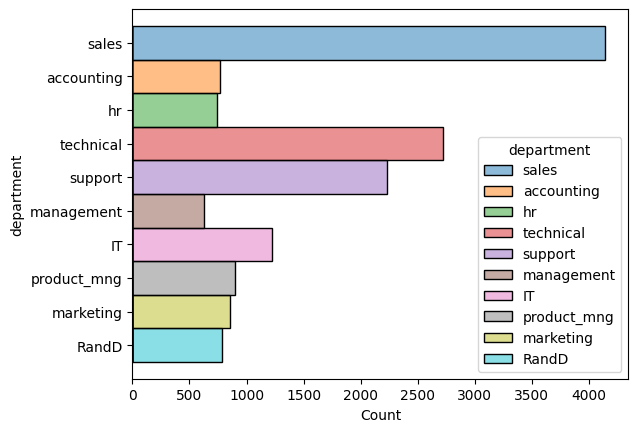

In [ ]:
sns.histplot(data = df, y = 'department', hue = 'department')

In [ ]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

<Axes: xlabel='salary', ylabel='Count'>

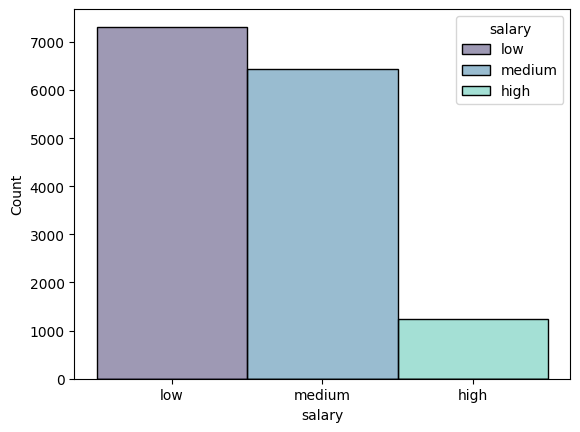

In [ ]:
sns.histplot(data = df, x = 'salary', hue = 'salary', palette="mako")

In [ ]:
df['promotion_last_5years'].value_counts() # Интересные цифры, всего 319 человек из 15000, повышались за последние 5 лет. Доля тех кто получил повышение 2,13%.

0    14680
1      319
Name: promotion_last_5years, dtype: int64

Text(0.5, 1.0, 'Повышался ли сотрудник за последние пять лет')

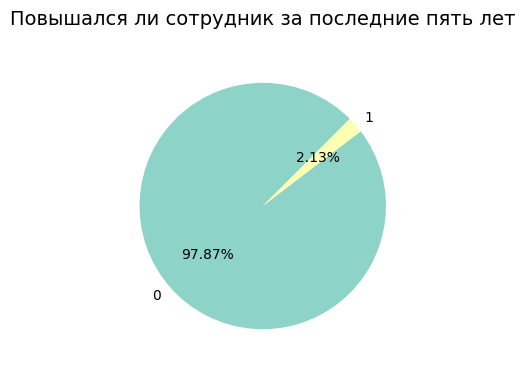

In [ ]:
plt.figure(figsize=(4,4))
plt.pie(df['promotion_last_5years'].value_counts(), labels = df['promotion_last_5years'].unique(), autopct='%1.2f%%', textprops={'fontsize':10}, startangle=45,
       colors=sns.color_palette('Set3'),  counterclock=True)
plt.title(
    label="Повышался ли сотрудник за последние пять лет", 
    fontdict={"fontsize":14},
    pad=20)

Задание 3: Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.

In [ ]:
df['time_spend_company'].unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7])

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.iloc[:, 0:5].corr().round(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10
last_evaluation,0.11,1.00,0.35,0.34,0.13
number_project,-0.14,0.35,1.00,0.42,0.20
average_montly_hours,-0.02,0.34,0.42,1.00,0.13
time_spend_company,-0.10,0.13,0.20,0.13,1.00


In [ ]:
df.iloc[:, 0:5].corr(method='spearman').round(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.00,0.16,0.01,0.06,-0.14
last_evaluation,0.16,1.00,0.35,0.34,0.16
number_project,0.01,0.35,1.00,0.40,0.25
average_montly_hours,0.06,0.34,0.40,1.00,0.17
time_spend_company,-0.14,0.16,0.25,0.17,1.00


In [ ]:
df.iloc[:, 0:5].corr(method='kendall')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.113865,0.022077,0.051126,-0.110005
last_evaluation,0.113865,1.000000,0.266267,0.235374,0.118842
number_project,0.022077,0.266267,1.000000,0.306987,0.195025
average_montly_hours,0.051126,0.235374,0.306987,1.000000,0.119466
time_spend_company,-0.110005,0.118842,0.195025,0.119466,1.000000


<Axes: >

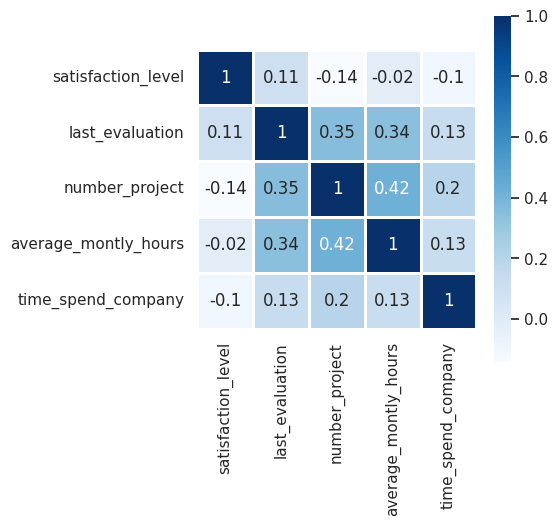

In [ ]:
sns.set(rc={'figure.figsize':(4.5, 4.5)})
sns.heatmap(df.iloc[:, 0:5].corr(), annot=True, square = True,linewidths = 0.75, linecolor = "white",  cmap = "Blues")

Две наиболее скоррелированные переменные: 

1.   average_montly_hours	и number_project
2.   last_evaluation и number_project

Две наименее скоррелированные переменные:


1.   number_project и satisfaction_level
2.   satisfaction_level и time_spend_company

Корреляция между данными не сильная, ее максимальное значение 0.42





In [ ]:
df.iloc[:, 0:5].head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.38,0.53,2,157,3
1,0.80,0.86,5,262,6
2,0.11,0.88,7,272,4
3,0.72,0.87,5,223,5
4,0.37,0.52,2,159,3


<Axes: xlabel='number_project', ylabel='average_montly_hours'>

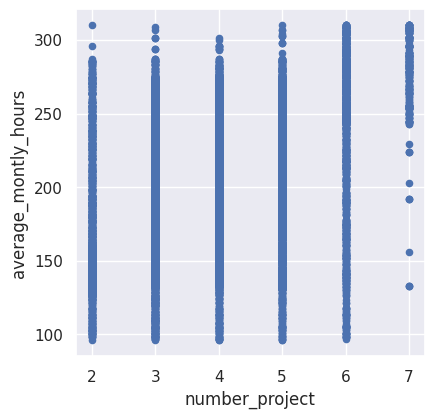

In [ ]:
df.plot(kind='scatter', y='average_montly_hours', x='number_project')

<Axes: xlabel='number_project', ylabel='last_evaluation'>

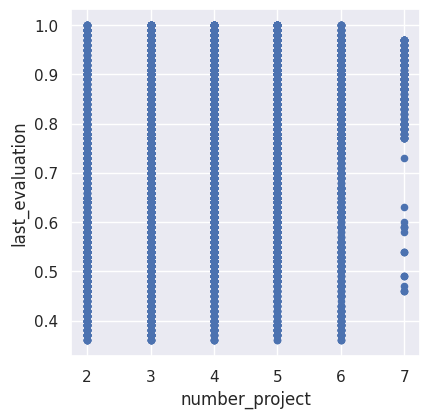

In [ ]:
df.plot(kind='scatter', y='last_evaluation', x='number_project')

In [ ]:
df[['average_montly_hours', 'number_project']].corr()

,average_montly_hours,number_project
average_montly_hours,1.000000,0.417211
number_project,0.417211,1.000000


Задание 4: Рассчитайте сколько сотрудников работает в каждом
департаменте.

In [ ]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

<Axes: xlabel='Count', ylabel='department'>

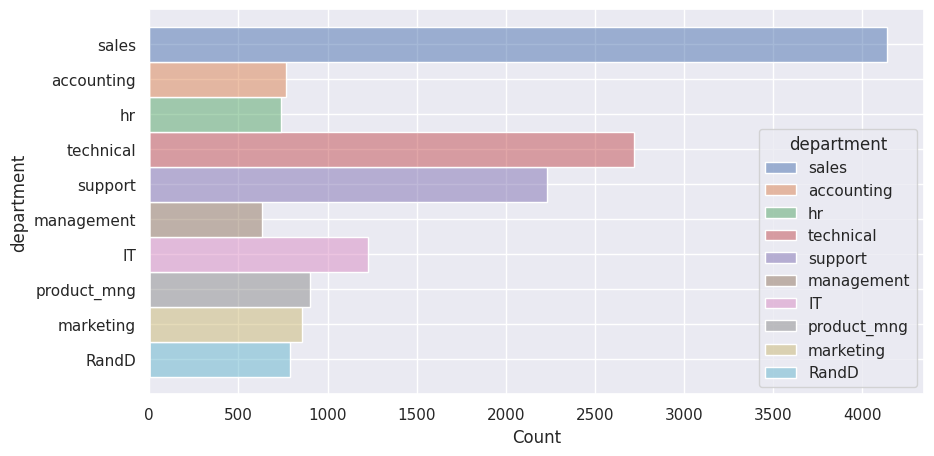

In [ ]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.histplot(data = df, y = 'department', hue = 'department')

Задание 5: Показать распределение сотрудников по зарплатам.

<Axes: xlabel='salary', ylabel='Frequency'>

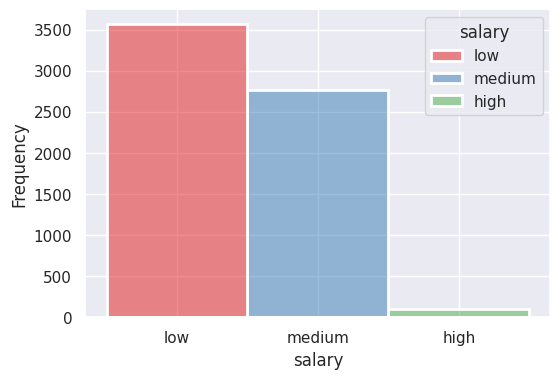

In [ ]:
sns.set(rc={'figure.figsize':(6,4)})
sns.histplot(data = df,x = 'salary', stat = "frequency", edgecolor = "white",
             linewidth = 2, hue = 'salary', palette = "Set1")


Задание 6: Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df_1 = df[df['department']=='sales'].groupby(by=['salary']).count().reset_index()
df_2 = df[df['department']=='hr'].groupby(by=['salary']).count().reset_index()
df_3 = df[df['department']=='accounting'].groupby(by=['salary']).count().reset_index()
df_4 = df[df['department']=='technical'].groupby(by=['salary']).count().reset_index()
df_5= df[df['department']=='support'].groupby(by=['salary']).count().reset_index()
df_6= df[df['department']=='management'].groupby(by=['salary']).count().reset_index()
df_7= df[df['department']=='IT'].groupby(by=['salary']).count().reset_index()
df_8= df[df['department']=='product_mng'].groupby(by=['salary']).count().reset_index()
df_9= df[df['department']=='marketing'].groupby(by=['salary']).count().reset_index()
df_10= df[df['department']=='RandD'].groupby(by=['salary']).count().reset_index()

In [ ]:
fig = make_subplots(rows=5, cols=2, subplot_titles=("sales", "hr", 'accounting',
                                                    'technical', 'support', 'management',
                                                    'IT', 'product_mng','marketing', 'RandD'))

fig.add_trace(go.Bar(x = df_1['salary'], y=df_1['department'], name="sales"), row=1, col=1)

fig.add_trace(go.Bar(x = df_2['salary'], y=df_2['department'], name="hr"),row=1, col=2)

fig.add_trace(go.Bar(x = df_3['salary'], y=df_3['department'], name="accounting"),row=2, col=1)

fig.add_trace(go.Bar(x = df_4['salary'], y=df_4['department'], name="technical"),row=2, col=2)

fig.add_trace(go.Bar(x = df_5['salary'], y=df_5['department'], name="support"),row=3, col=1)

fig.add_trace(go.Bar(x = df_6['salary'], y=df_6['department'], name="management"),row=3, col=2)

fig.add_trace(go.Bar(x = df_7['salary'], y=df_7['department'], name="IT"),row=4, col=1)

fig.add_trace(go.Bar(x = df_8['salary'], y=df_8['department'], name="product_mng"),row=4, col=2)

fig.add_trace(go.Bar(x = df_9['salary'], y=df_9['department'], name="marketing"),row=5, col=1)

fig.add_trace(go.Bar(x = df_10['salary'], y=df_10['department'], name="RandD"),row=5, col=2)

fig.update_layout(height=1000, width=1300, title_text="<b>Распределение зарплат сотрудников по департаментам<b>")


fig.show()

Задание 7: Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df_low = df[df['salary']=='low'].iloc[:, [3,9]]

In [ ]:
df_high = df[df['salary']=='high'].iloc[:, [3,9]]

<function matplotlib.pyplot.show(close=None, block=None)>

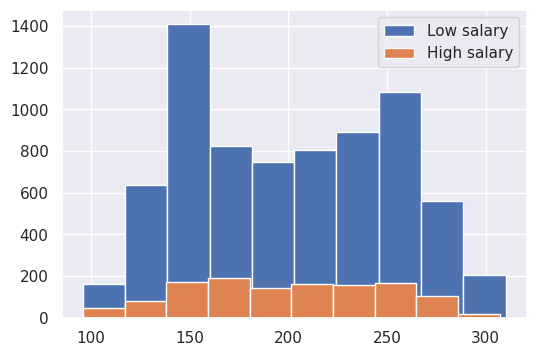

In [ ]:
plt.hist(df_low['average_montly_hours'], label='Low salary')
plt.hist(df_high['average_montly_hours'], label='High salary')
plt.legend(loc='upper right')
plt.show

Задание 8: Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):

* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

In [ ]:
df_left = df[df['left']==1]

In [ ]:
df_left.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3571 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     3571 non-null   float64
 1   last_evaluation        3571 non-null   float64
 2   number_project         3571 non-null   int64  
 3   average_montly_hours   3571 non-null   int64  
 4   time_spend_company     3571 non-null   int64  
 5   Work_accident          3571 non-null   int64  
 6   left                   3571 non-null   int64  
 7   promotion_last_5years  3571 non-null   int64  
 8   department             3571 non-null   object 
 9   salary                 3571 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 306.9+ KB


Из тех, кто уволился, всего 19 человек или 0,005% получали повышение за последние 5 лет.

In [ ]:
df_left['promotion_last_5years'].value_counts(normalize=True)

0    0.994679
1    0.005321
Name: promotion_last_5years, dtype: float64

In [ ]:
df_left['promotion_last_5years'].value_counts()

0    3552
1      19
Name: promotion_last_5years, dtype: int64

Средняя степень удоволетворенности работой составляет 0,44. В описании данных не сказано как интепритировать это значение, относительно чего оно взято.

In [ ]:
df_left['satisfaction_level'].mean()

0.4400980117614114

В среднем уволившийся сотрудник за время работы выполнял 3,8 проекта.

In [ ]:
df_left['number_project'].mean()

3.8555026603192384

Среди тех, кто не уволился, повышение получили 0,02% или 300 человек. Цифра чуть выше но все равно очень маленькие.

In [ ]:
df_noleft = df[df['left']==0]

In [ ]:
df_noleft['promotion_last_5years'].value_counts(normalize=True)

0    0.973749
1    0.026251
Name: promotion_last_5years, dtype: float64

In [ ]:
df_noleft['promotion_last_5years'].value_counts()

0    11128
1      300
Name: promotion_last_5years, dtype: int64

Уровень удоволетворенности работой у сотрудников, которые не уволились выше 0.66%

In [ ]:
df_noleft['satisfaction_level'].mean()

0.666809590479524

Среднее количество выполненных проектов 3.7. Здесь показатели примерно одинаковые.

In [ ]:
df_noleft['number_project'].mean()

3.786664333216661

Задание 9: Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
X = df.drop(['left', 'department', 'salary'], axis=1)
y = df['left']

In [ ]:
np.unique(y)

array([0, 1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.20, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(11999, 7)
(3000, 7)


In [ ]:
sc = StandardScaler() #присвоили переменной объект StandardScaler
sc.fit(X_train) #вычисляем среднее и ст.откл. для признаков в тренировочных данных
X_train_std = sc.transform(X_train) #стандартиризовали тренир.данные используя параметры из sc.fit(X_train)
X_test_std = sc.transform(X_test) #передали тот же маштаб стандартизации тестовому набору

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()

In [ ]:
lda.fit(X_train_std, y_train)

LinearDiscriminantAnalysis()

In [ ]:
lda.predict(X_test_std)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
print (f"Accuracy: {accuracy_score(y_test, lda.predict(X_test_std))}")
print (classification_report(y_test, lda.predict(X_test_std)))

Accuracy: 0.7533333333333333
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      2294
           1       0.45      0.24      0.31       706

    accuracy                           0.75      3000
   macro avg       0.62      0.57      0.58      3000
weighted avg       0.71      0.75      0.72      3000



In [ ]:
model_matrix = confusion_matrix(y_test, lda.predict(X_test_std), labels = [0,1])

In [ ]:
model_matrix_df = pd.DataFrame(model_matrix)
model_matrix_df

,0,1
0,2094,200
1,540,166


Попробуем применить метод MinMaxScaler для маштабирования наших признаков.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lda.fit(X_train_scaled, y_train)

LinearDiscriminantAnalysis()

In [ ]:
print (f"Accuracy: {accuracy_score(y_test, lda.predict(X_test_scaled))}")
print (classification_report(y_test, lda.predict(X_test_scaled)))

Accuracy: 0.7533333333333333
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      2294
           1       0.45      0.24      0.31       706

    accuracy                           0.75      3000
   macro avg       0.62      0.57      0.58      3000
weighted avg       0.71      0.75      0.72      3000



In [ ]:
model_matrix = confusion_matrix(y_test, lda.predict(X_test_scaled), labels = [0,1])

In [ ]:
model_matrix_df = pd.DataFrame(model_matrix)
model_matrix_df

,0,1
0,2094,200
1,540,166


Отвечая на вопрос задания " уволился ли сотрудник на основе имеющихся факторов", то наша модель очень плохо предсказывает признак 1(сотрудник уволился). Метрика precision = 0.45, а это значит, что более половины параметров наша модель неправильно классифицирует, recall = 0.24 - всего 24% параметров правильно классифицированы относительно общего количества. F1-score 58% в целом говорит об очень низком качестве наших прогнозов.